<a href="https://colab.research.google.com/github/willis1116/Tibame_Machine-Learning/blob/main/0922_Regressiontion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CRIM：人均犯罪率

ZN：25,000平方英尺以上民用土地的比例

INDUS：城镇非零售业商用土地比例

CHAS：是否邻近查尔斯河，1是邻近，0是不邻近

NOX：一氧化氮浓度（千万分之一）

RM：住宅的平均房间数

AGE：自住且建于1940年前的房屋比例

DIS：到5个波士顿就业中心的加权距离

RAD：到高速公路的便捷度指数

TAX：每万元的房产税率

PTRATIO：城镇学生教师比例

B： 1000(Bk − 0.63)2 其中Bk是城镇中黑人比例

LSTAT：低收入人群比例

ans：自住房中位数价格，单位是千元

In [6]:
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()
df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
df['ans'] = boston['target']
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ans
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [2]:
#進入sklearn就避免使用dataframe, 使用numpy array, df中間會有抽空
import numpy as np
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop(['ans'], axis=1), df['ans'], test_size = 0.1)


In [4]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=2)
reg.fit(x_train, y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

[Text(390.6, 634.1999999999999, 'LSTAT <= 9.63\nmse = 83.487\nsamples = 455\nvalue = 22.37'),
 Text(195.3, 380.52, 'RM <= 6.908\nmse = 77.296\nsamples = 186\nvalue = 29.746'),
 Text(97.65, 126.84000000000003, 'mse = 35.152\nsamples = 125\nvalue = 25.582'),
 Text(292.95000000000005, 126.84000000000003, 'mse = 55.352\nsamples = 61\nvalue = 38.277'),
 Text(585.9000000000001, 380.52, 'LSTAT <= 16.085\nmse = 24.149\nsamples = 269\nvalue = 17.271'),
 Text(488.25, 126.84000000000003, 'mse = 10.861\nsamples = 136\nvalue = 20.277'),
 Text(683.5500000000001, 126.84000000000003, 'mse = 19.041\nsamples = 133\nvalue = 14.196')]

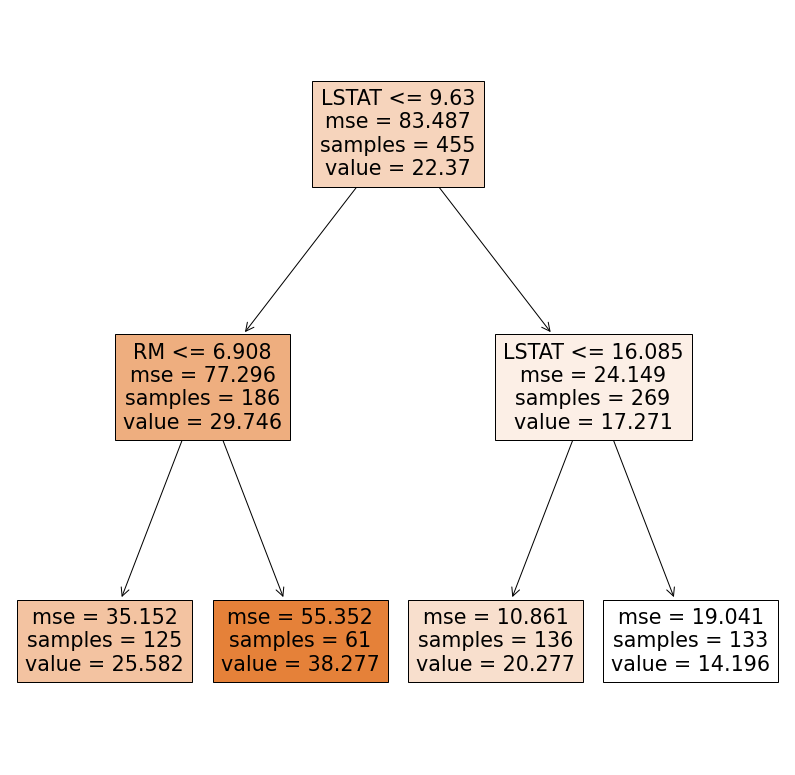

In [5]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(14, 14))
plot_tree(reg,
     feature_names=boston["feature_names"],
     filled=True)
